# <center><div style="font-family: Times New Roman; font-size: 30px; border-radius : 10px; background-color: #dc839eff; color: #d3e381ff; padding: 12px; line-height: 0.7;">Import Library</div></center> 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm

# <center><div style="font-family: Times New Roman; font-size: 30px; border-radius : 10px; background-color: #dc839eff; color: #d3e381ff; padding: 12px; line-height: 0.7;">Regresi dengan data Random</div></center>

In [14]:
np.random.seed(7)
x = 3 * np.random.randn(120) + 2
res = 0.8 * np.random.randn(120)
y = 5 + 0.5 * x + res

df = pd.DataFrame(
    {'x': x,
     'y': y}
)

df

,x,y
0,7.071577,8.223479
1,0.602188,4.624356
2,2.098460,6.558921
3,3.222549,6.715773
4,-0.366769,4.755964
...,...,...
115,2.548702,7.211466
116,2.066734,6.949620
117,0.712794,5.078634
118,0.055684,4.607498


# <center><div style="font-family: Times New Roman; font-size: 30px; border-radius : 10px; background-color: #dc839eff; color: #d3e381ff; padding: 12px; line-height: 0.7;">Regresi Sederhana</div></center>

alpha = 4.93989194688757
beta = 0.4980622553288568


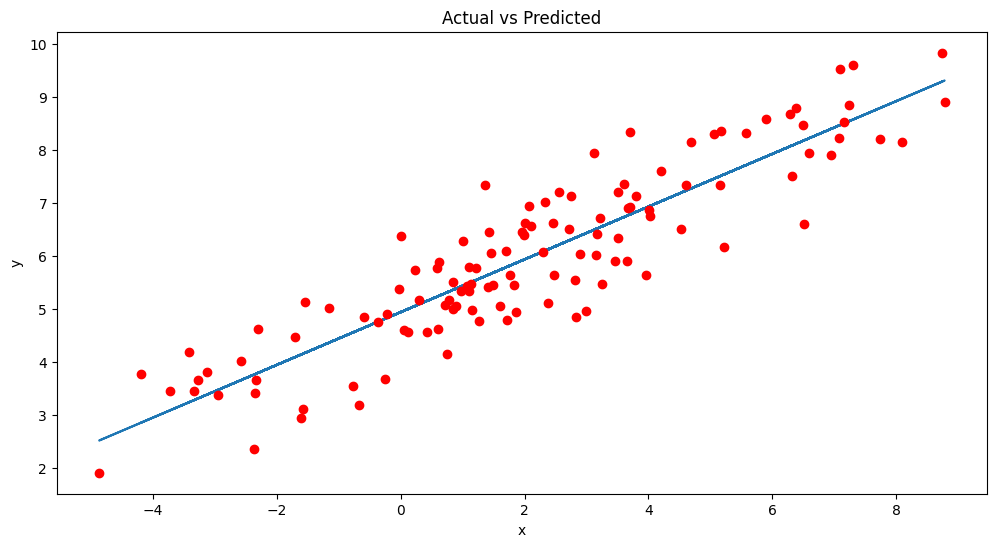

In [15]:
# hitung mean x dan y
xmean = np.mean(x)
ymean = np.mean(y)

# hitung covariance dan variance
df["xycov"] = (df["x"] - xmean) * (df["y"] - ymean)
df["xvar"] = (df["x"] - xmean)**2

# hitung beta and alpha
beta = df["xycov"].sum() / df["xvar"].sum()
alpha = ymean - (beta*xmean)
print(f"alpha = {alpha}")
print(f"beta = {beta}")

# fungsi prediksi
ypred = alpha + beta * x     

# plot regression
plt.figure(figsize=(12, 6))
plt.plot(x, ypred)
plt.plot(x, y, "ro")
plt.title("Actual vs Predicted")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

# <center><div style="font-family: Times New Roman; font-size: 30px; border-radius : 10px; background-color: #dc839eff; color: #d3e381ff; padding: 12px; line-height: 0.7;">Regresi Berganda & Plot 3D</div></center>

In [16]:
# mengahasilkan data acak
np.random.seed(21)
x1 = np.random.randint(5, 81, 60)
x2 = np.random.randint(10, 91, 60)
y = 10 + 2 * x1 + 3 * x2 + np.random.normal(0, 15, 60)

# membuat dataframe
df = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "y": y
})

# analisis regresi sederhana
x =sm.add_constant(df[["x1", "x2"]])
model = sm.OLS(df["y"], x). fit()

# mendapatkan koefisien regresi
koefisien = model.params

# scatter plot 3D
scatter_plot = go.Scatter3d(
    x=df["x1"],
    y=df["x2"],
    z=df["y"],
    mode="markers",
    marker=dict(
        size=5,
        color="blue",
        opacity=0.8
    ),
    name="Data"
)

# membuat grid untuk permukaan regresi
x1_grid, x2_grid = np.meshgrid(np.linspace(1, 50, 10), np.linspace(3, 60, 10))
y_pred = koefisien.iloc[0] + koefisien.iloc[1] * x1_grid + koefisien.iloc[2] * x2_grid

# permukaan regresi 3D
regresion_surface = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_pred,
    colorscale="Blues",
    opacity=0.5,
    name="Garis Regresi"
)

# membuat layout plot
layout = go.Layout(
    title="Scatter Plot 3D dengan Garis Regresi Berganda",
    scene=dict(
        xaxis_title="x1",
        yaxis_title="x2",
        zaxis_title="y"
    ),
    showlegend=True 
)

# membuat figure dengan scatter plot dan permukaan regresi
fig = go.Figure(data=[scatter_plot, regresion_surface], layout=layout)

# menampilkan plot
fig.show()
